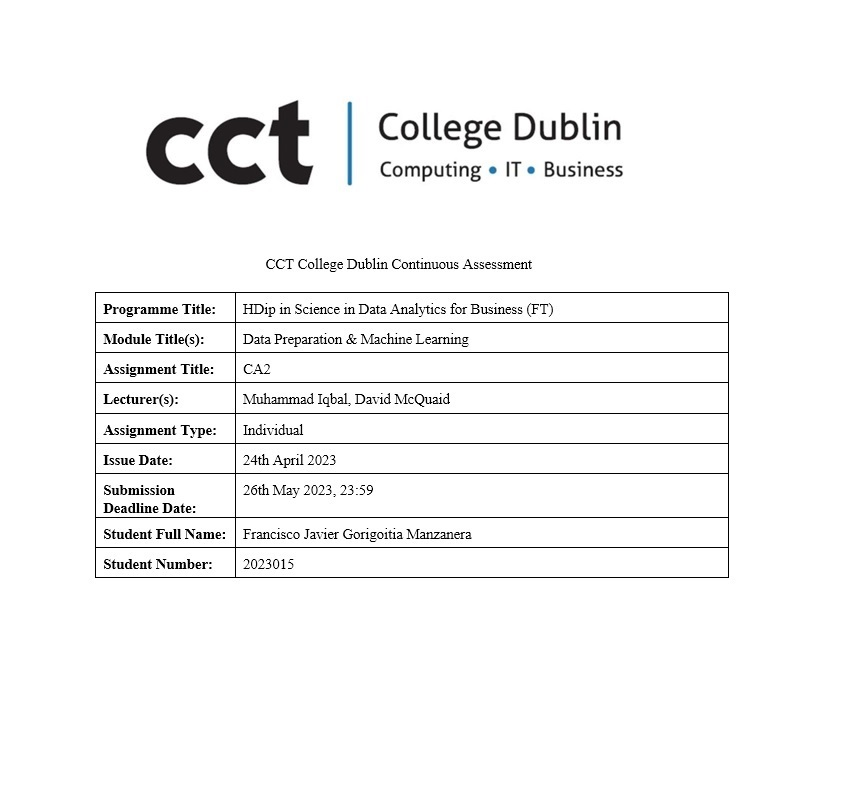

In [1]:
#Image
from IPython.display import Image
Image(filename =r'Programme.jpg')

# Business Understanding 

In this project, we will carry out an analysis of our database called "df_integrated".

This database contains information about a company's employees, and our goal is to measure and improve satisfaction, and productivity, and address any identified issues related to employees.

To carry out this analysis, we will follow the steps of the CRISP-DM model (Cross-Industry Standard Process for Data Mining). This model will provide a structure and a guide to conduct a thorough and professional.

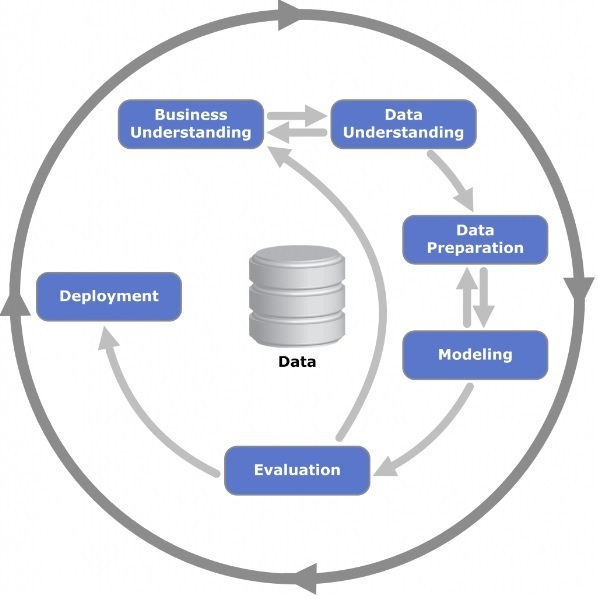

In [2]:
#Image
from IPython.display import Image
Image(filename =r'CRISP-DM.jpg')

# Data Understanding

In this step, we are going to collect the data relevant to our analysis so I will perform an initial exploration of the data to understand its structure, quality and characteristics and thus be able to identify potential problems or challenges associated with the data, such as missing values or inconsistencies.

In the initial exploration of the data I was able to identify the following anomalies and inconsistencies:

First of all, we do not know what the company's business is, but we can assume that due to the characteristics of the roles and departments that make it up, we can assume that the company is a Pharmaceutical company or a research and development company.

Next, I will give my opinion and observation of some variables within our Data Frame which I could not identify what they refer to:

- Daily Rate: We do not know what this variable refers to, does this variable refer to the daily expense per trip? or does this variable refer to the daily rate charged by the employee?


- Hourly Rate: This variable has an inconsistency since when multiplying the Hourly Rate by Standard Hours (80) it does not reflect the same information provided by the Monthly Income variable, so we do not know what this variable refers to.


- Monthly Rate: We do not know what this variable refers to.


- Overtime: We know what this variable refers to but we do not know the number of additional hours the worker worked, since it only indicates Yes or No.


- Performance Rating: We don't know what this variable refers to since it only has two values, 3 and 4, we don't know if this is good, bad, etc.


- StandardHours tells us that the standard working day for each worker is 80 hours, but it does not tell us if the variable is monthly, weekly or daily.


After using "df_integrated.head" we can identify that there are category, text and numeric variables, we can also identify that there are Object and Int type variables.


On the other hand, our Data Frame is composed of 1470 rows and 35 columns, of which we do not identify null values.

In [3]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing the dataset.

df_integrated = pd.read_csv('Integrated_CA2_Dataset.csv')

### Characterization of the data set

In [5]:
df_integrated.head(-5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7


In [6]:
df_integrated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
nulls = df_integrated.isna().sum()
print(nulls)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

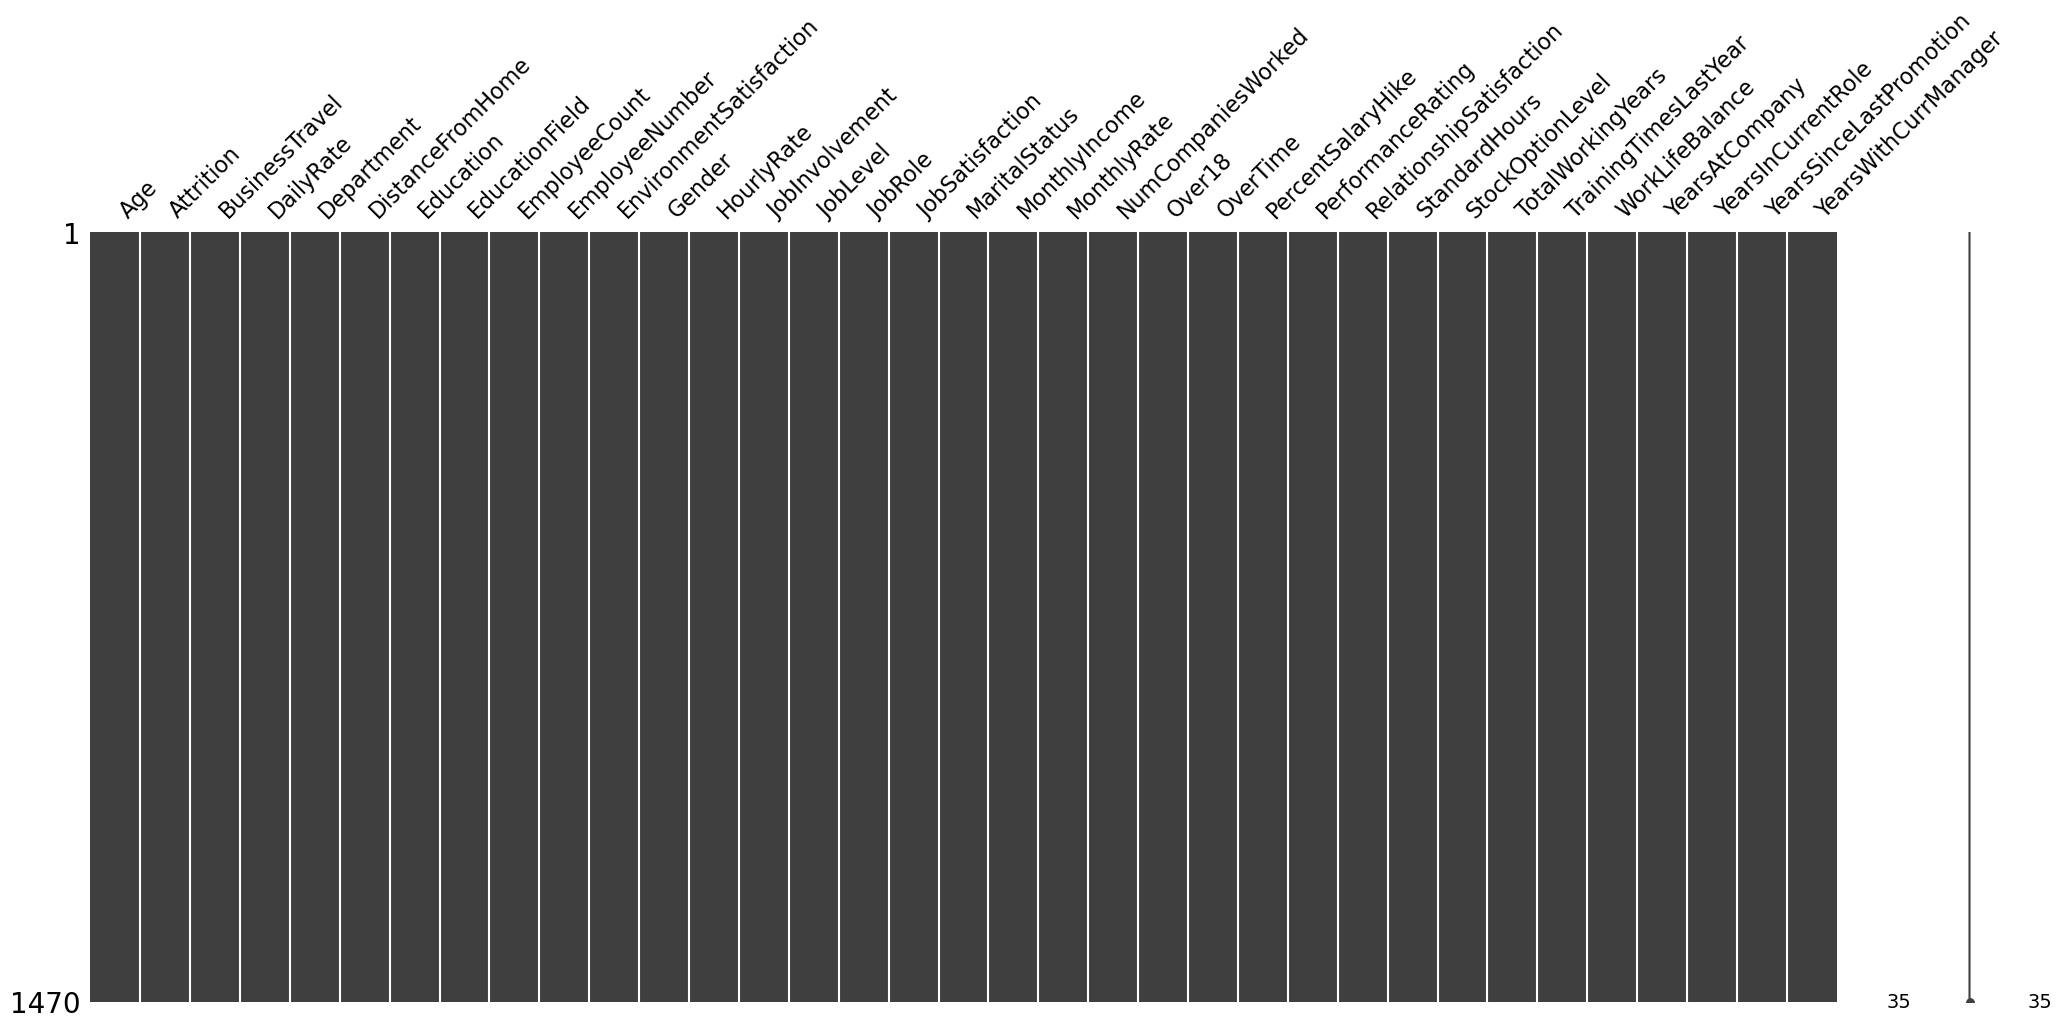

In [8]:
import missingno as msno

msno.matrix(df_integrated)

# Data Preparation

In this step, we'll prepare and clean the data to ensure it's ready for analysis. I will select the relevant variables, treatment of missing values, data transformation and integration of different data sources, if necessary.

After our initial analysis, we can identify the following:

- The variables EmplyeeCount and EmployeeNumber have the sole function of identifying each employee, so it is not necessary to include them in our Data Frame, since they do not alter our main objective, they will be eliminated.


- The variable Over 18 years indicates that the worker is of legal age, all workers are over 18 years of age, so this variable is not necessary for our analysis either, so it will also be eliminated.


- The StandardHours variable tells us that the standard working day of each worker is 80 hours, it does not tell us if the variable is monthly, weekly or daily. However, this variable is the same for each worker in the company, so it will also be eliminated since it does not affect us to carry out our analysis nor does it affect our main objective.

In [9]:
df_integrated.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace = True)

### Data transformation

We will carry out the transformation of the following category variables to numerical variables to later be able to carry out the necessary analysis.


The variables that will be modified are shown in the following table:

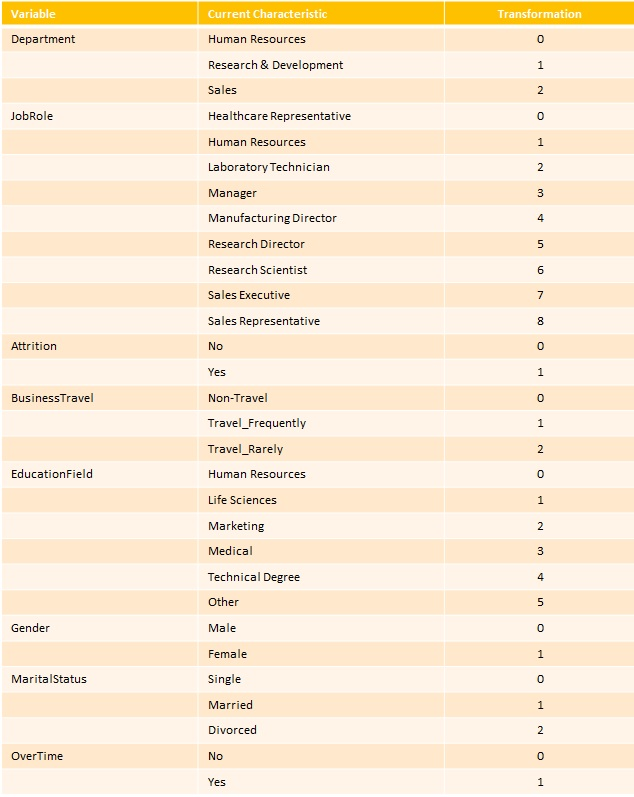

In [10]:
#Image
from IPython.display import Image
Image(filename =r'Data_transformation.jpg')

In [11]:
# Data transformation

df_integrated['Department'].replace('Human Resources', 0, inplace = True)
df_integrated['Department'].replace('Research & Development', 1, inplace = True)
df_integrated['Department'].replace('Sales', 2, inplace = True)


df_integrated['JobRole'].replace('Healthcare Representative', 0, inplace = True)
df_integrated['JobRole'].replace('Human Resources', 1, inplace = True)
df_integrated['JobRole'].replace('Laboratory Technician', 2, inplace = True)
df_integrated['JobRole'].replace('Manager', 3, inplace = True)
df_integrated['JobRole'].replace('Manufacturing Director', 4, inplace = True)
df_integrated['JobRole'].replace('Research Director', 5, inplace = True)
df_integrated['JobRole'].replace('Research Scientist', 6, inplace = True)
df_integrated['JobRole'].replace('Sales Executive', 7, inplace = True)
df_integrated['JobRole'].replace('Sales Representative', 8, inplace = True)


df_integrated['Attrition'].replace('No', 0, inplace = True)
df_integrated['Attrition'].replace('Yes', 1, inplace = True)


df_integrated['BusinessTravel'].replace('Non-Travel', 0, inplace = True)
df_integrated['BusinessTravel'].replace('Travel_Frequently', 1, inplace = True)
df_integrated['BusinessTravel'].replace('Travel_Rarely', 2, inplace = True)


df_integrated['EducationField'].replace('Human Resources', 0, inplace = True)
df_integrated['EducationField'].replace('Life Sciences', 1, inplace = True)
df_integrated['EducationField'].replace('Marketing', 2, inplace = True)
df_integrated['EducationField'].replace('Medical', 3, inplace = True)
df_integrated['EducationField'].replace('Technical Degree', 4, inplace = True)
df_integrated['EducationField'].replace('Other', 5, inplace = True)


df_integrated['Gender'].replace('Male', 0, inplace = True)
df_integrated['Gender'].replace('Female', 1, inplace = True)


df_integrated['MaritalStatus'].replace('Single', 0, inplace = True)
df_integrated['MaritalStatus'].replace('Married', 1, inplace = True)
df_integrated['MaritalStatus'].replace('Divorced', 2, inplace = True)


df_integrated['OverTime'].replace('No', 0, inplace = True)
df_integrated['OverTime'].replace('Yes', 1, inplace = True)

In general, Machine Learning models usually work with data of the "float" type. This is because float-type data allows greater precision in the calculations and the representation of the data. However, it is not a general rule since data of type "int" can also be used.

In this case, we will use float-type data which we will modify with the following syntax:

- df_integrated = df_integrated.astype(float)


Reference: Introduction to Machine Learning with Python Book by Andreas C. Müller and Sarah Guido

In [12]:
df_integrated = df_integrated.astype(float)

# Modeling

In this step, we will take an in-depth look at statistical information such as the mean, standard deviation, minimum, maximum, 25th, 50th, and 75th quartiles, where the 50th quartile is also known as the median.

Subsequently, we will select and apply appropriate modelling techniques to analyze the data and respond to the objectives of our project. This may involve the use of machine learning algorithms, statistical techniques, or other data analysis tools.

## Analysis of Variables by Group

In this section of the project, an analysis of the variables will be carried out by groups with the aim of achieving a more organized and structured presentation. This methodology will allow segmenting the analysis and focusing on each of the satisfaction variables, in order to discover possible relationships or trends in the data that can be used to improve satisfaction, and productivity and address employee problems.

The groups have been defined based on the Satisfaction Variables as dependent variables and using the ANOVA statistical technique since it is generally used when we have categorical variables or defined groups.

>The ANOVA is a technique that is used to compare the means of two or more groups and determine if there are significant differences between them. It is based on the decomposition of the total variance into components attributable to different sources of variation.

>The main objective of the ANOVA is to determine if the variation between the groups is greater than the variation within the groups, which would imply that there is a significant influence of at least one independent variable on the dependent variable.

Reference: https://www.scribbr.com/statistics/one-way-anova/
                   

### ANOVA

In the following diagram, we can see the variables that have a significant effect on the Satisfaction variables after using the ANOVA statistical technique.

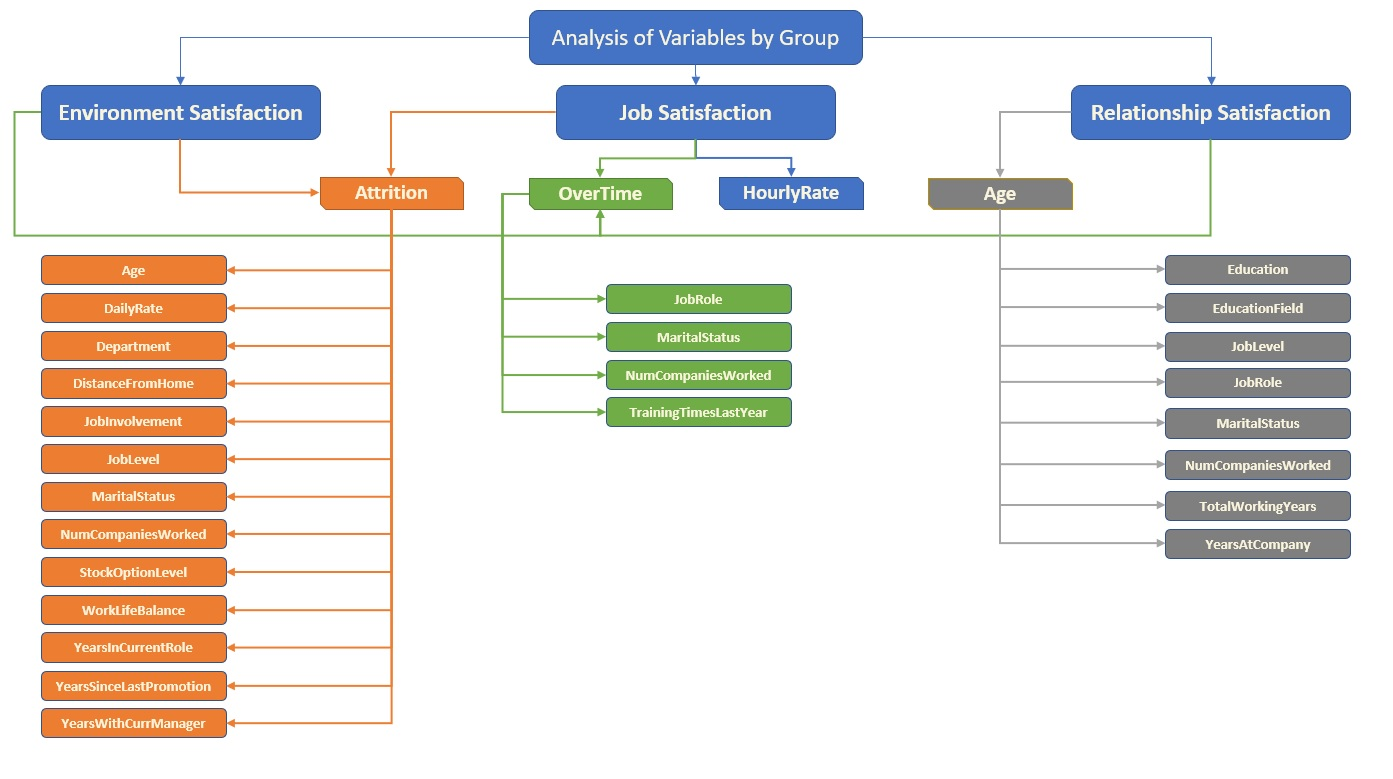

In [13]:
#Image
from IPython.display import Image
Image(filename =r'ANOVA.jpg')

In [14]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "EnvironmentSatisfaction ~ Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("Variables with a significant effect on Environment Satisfaction:")
print(significant_columns)


formula = "JobSatisfaction ~ Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + EnvironmentSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("\nVariables with a significant effect on Job Satisfaction:")
print(significant_columns)


formula = "RelationshipSatisfaction ~ Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + EnvironmentSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + JobSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("\nVariables with a significant effect on Relationship Satisfaction:")
print(significant_columns)

Variables with a significant effect on Environment Satisfaction:
['Attrition', 'OverTime']

Variables with a significant effect on Job Satisfaction:
['Attrition', 'HourlyRate', 'OverTime']

Variables with a significant effect on Relationship Satisfaction:
['Age', 'OverTime']


In [15]:
# ANOVA
formula = "Attrition ~ Age + EnvironmentSatisfaction + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("Variables with a significant effect on Attrition:")
print(significant_columns)



formula = "OverTime ~ Age + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + EnvironmentSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + JobSatisfaction + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("\nVariables with a significant effect on OverTime:")
print(significant_columns)



formula = "HourlyRate ~ Age + EnvironmentSatisfaction + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + Attrition + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("\nVariables with a significant effect on Hourly Rate:")
print(significant_columns)



formula = "Age ~ OverTime + Attrition + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + EnvironmentSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + JobSatisfaction + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("\nVariables with a significant effect on Age:")
print(significant_columns)

Variables with a significant effect on Attrition:
['Age', 'EnvironmentSatisfaction', 'DailyRate', 'Department', 'DistanceFromHome', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables with a significant effect on OverTime:
['Attrition', 'JobRole', 'EnvironmentSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingTimesLastYear']

Variables with a significant effect on Hourly Rate:
['JobSatisfaction']

Variables with a significant effect on Age:
['Attrition', 'Education', 'EducationField', 'JobLevel', 'JobRole', 'MaritalStatus', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany']


As we can see in the previous analysis through the ANOVA technique we can indicate the following:

- The dependent variable that we will use is the 'JobSatisfaction' variable since the 'Attrition', 'HourlyRate' and 'OverTime' variables have a significant effect on the 'JobSatisfaction' variable, on the other hand, the 'EnvironmentSatisfaction' and ' RelationshipSatisfaction' have a significant effect on the 'Attrition' variable. The same thing happens with the 'OverTime' variable.

- Also the 'Attrition' variable has a significant effect on the 'Age' variable.

In conclusion, the 'JobSatisfaction' variable has a direct and indirect relationship with all the variables, which is why we will use it as our dependent variable.

### Satisfaction Factors

Before continuing, I will give you a name for values 1, 2, 3 and 4 of the Satisfaction variables:

- 1 = Unsatisfied

- 2 = Neutral

- 3 = Satisfied

- 4 = Very Satisfied                                  

Having said the above and according to the ANOVA analysis, we can indicate the following:


- Attrition: This variable refers to the rate of turnover or abandonment of employees in the company. The fact that a significant relationship was found between Attrition and Job Satisfaction indicates that there is an association between the propensity of employees to leave the company and their level of job satisfaction.


- OverTime: This variable indicates whether employees work overtime or not. The fact that a significant relationship has been found implies that overtime may affect the job satisfaction of employees. Those who work overtime may have different job satisfaction compared to those who do not.

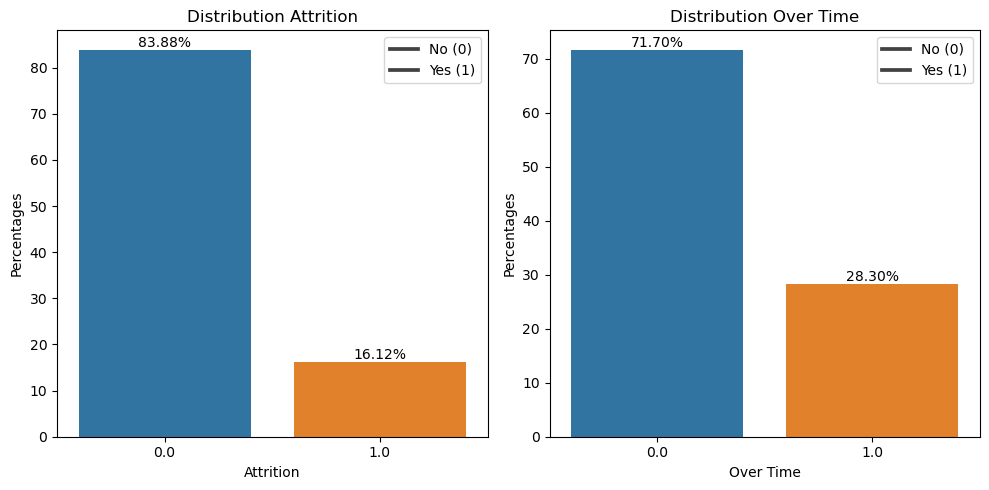

In [16]:
# Grafic Attrition

attrition_counts = df_integrated['Attrition'].value_counts()
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

overtime_counts = df_integrated['OverTime'].value_counts()
overtime_percentages = overtime_counts / overtime_counts.sum() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=attrition_percentages.index, y=attrition_percentages, ax=ax1)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
ax1.set_title('Distribution Attrition')
ax1.set_xlabel('Attrition')
ax1.set_ylabel('Percentages')
ax1.legend(['No (0)', 'Yes (1)'])

sns.barplot(x=overtime_percentages.index, y=overtime_percentages, ax=ax2)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
ax2.set_title('Distribution Over Time')
ax2.set_xlabel('Over Time')
ax2.set_ylabel('Percentages')
ax2.legend(['No (0)', 'Yes (1)'])


plt.tight_layout()
plt.show()


- HourlyRate: This variable represents the hourly rate of payment of the employees. The finding of a significant effect implies that the hourly wage employees receive has an influence on their job satisfaction. Employees with higher or lower hourly rates may have different levels of job satisfaction.

- mean: The mean or average of the "HourlyRate" variable. In this case, the mean is approximately 65.89.


- std: The standard deviation of the "HourlyRate" variable. It measures the spread of values around the mean. A high value indicates greater variability. In this case, the standard deviation is approximately 20.33.


- min: The minimum value observed in the "HourlyRate" variable. In this case, the minimum value is 30.


- 25%: The first quartile of the "HourlyRate" variable. It represents the value below which 25% of the data is found, ordered from smallest to largest. In this case, the first quartile is 48.


- 50%: The median or second quartile of the "HourlyRate" variable. Represents the value that separates half of the data ordered from smallest to largest. In this case, the median is 66.


- 75%: The third quartile of the "HourlyRate" variable. It represents the value below which 75% of the data is found, ordered from smallest to largest. In this case, the third quartile is 83.75.


- max: The maximum value observed in the "HourlyRate" variable. In this case, the maximum value is 100.

In [17]:
hourly_rate_stats = df_integrated['HourlyRate'].describe()
print(hourly_rate_stats)

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


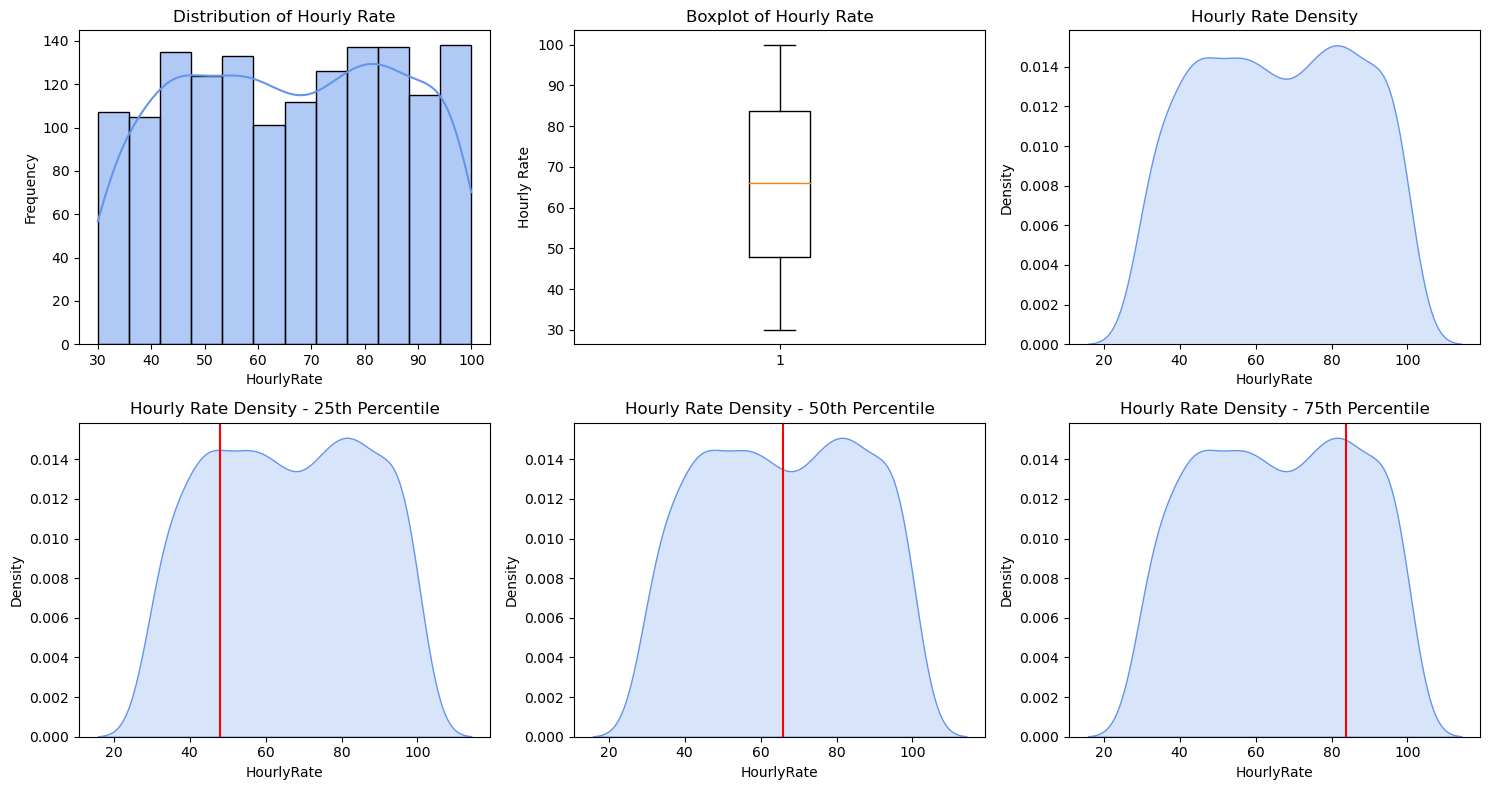

In [18]:
# Grafic Hourly Rate
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram
sns.histplot(data=df_integrated, x="HourlyRate", kde=True, ax=axs.flat[0], color='cornflowerblue')
axs.flat[0].set_xlabel('HourlyRate')
axs.flat[0].set_ylabel('Frequency')
axs.flat[0].set_title('Distribution of Hourly Rate')

# Boxplot
axs.flat[1].boxplot(df_integrated['HourlyRate'])
axs.flat[1].set_title('Boxplot of Hourly Rate')
axs.flat[1].set_ylabel('Hourly Rate')

# Density chart
sns.kdeplot(df_integrated['HourlyRate'], shade=True, color='cornflowerblue', ax=axs.flat[2])
axs.flat[2].set_title('Hourly Rate Density')

# Density charts with 25th, 50th and 75th percentiles
for i, percentile in enumerate([25, 50, 75]):
    sns.kdeplot(df_integrated['HourlyRate'], shade=True, color='cornflowerblue', ax=axs.flat[i+3])
    axs.flat[i+3].axvline(x=np.percentile(df_integrated['HourlyRate'], percentile), color='red')
    axs.flat[i+3].set_title(f'Hourly Rate Density - {percentile}th Percentile')

plt.tight_layout()
plt.show()

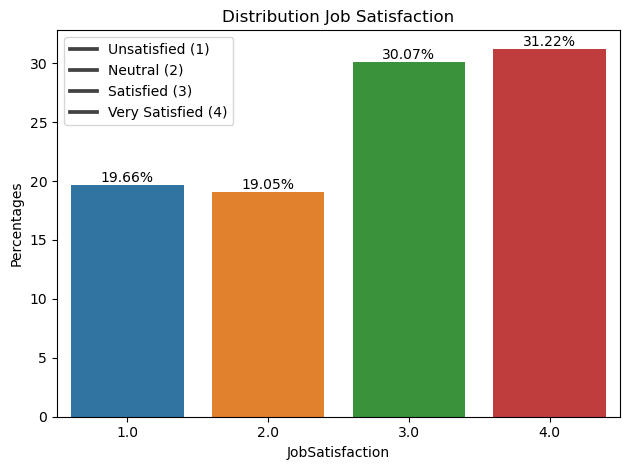

In [19]:
# Grafic Job Satisfaction

attrition_counts = df_integrated['JobSatisfaction'].value_counts()
attrition_percentages = attrition_counts / attrition_counts.sum() * 100

fig, ax = plt.subplots()

sns.barplot(x=attrition_percentages.index, y=attrition_percentages, ax=ax)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

ax.set_title('Distribution Job Satisfaction')
ax.set_xlabel('JobSatisfaction')
ax.set_ylabel('Percentages')

legend_labels = ['Unsatisfied (1)', 'Neutral (2)','Satisfied (3)','Very Satisfied (4)' ]
ax.legend(legend_labels)

plt.tight_layout()
plt.show()

In summary, these ANOVA results suggest that the variables 'Attrition', 'HourlyRate' and 'OverTime' are important in understanding and predicting employee job satisfaction. These variables can be considered key factors to take into account when analyzing and addressing job satisfaction in this organization.

### Productivity

The ANOVA showed that the variables 'PercentSalaryHike' and 'TotalWorkingYears' have a significant effect on the dependent variable 'Performance Rating'.


This means that there is statistical evidence to affirm that the variables 'PercentSalaryHike' and 'TotalWorkingYears' have a significant influence on the performance rating of employees.


In other words, the results indicate that percentage increases in salary and total years worked have a statistically significant relationship with the performance rating of employees. However, it is important to note that the ANOVA does not provide information about the direction or strength of the relationship, it only indicates that there is a significant association between these variables.


These results can be useful to understand what factors may be influencing the performance rating of employees and provide insights for decision-making related to performance management in the organization.

In [20]:
# ANOVA
formula = "PerformanceRating ~ Age + EnvironmentSatisfaction + BusinessTravel + DailyRate + Department + DistanceFromHome + Education + EducationField + Gender + HourlyRate + JobInvolvement + JobLevel + JobRole + JobSatisfaction + MaritalStatus + MonthlyIncome + MonthlyRate + NumCompaniesWorked + OverTime + PercentSalaryHike + Attrition + RelationshipSatisfaction + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager"
model = ols(formula, data=df_integrated).fit()
anova_table = sm.stats.anova_lm(model)

significant_columns = anova_table[anova_table['PR(>F)'] < 0.05].index.tolist()

print("Variables with a significant effect on Performance Rating:")
print(significant_columns)

Variables with a significant effect on Performance Rating:
['PercentSalaryHike', 'TotalWorkingYears']


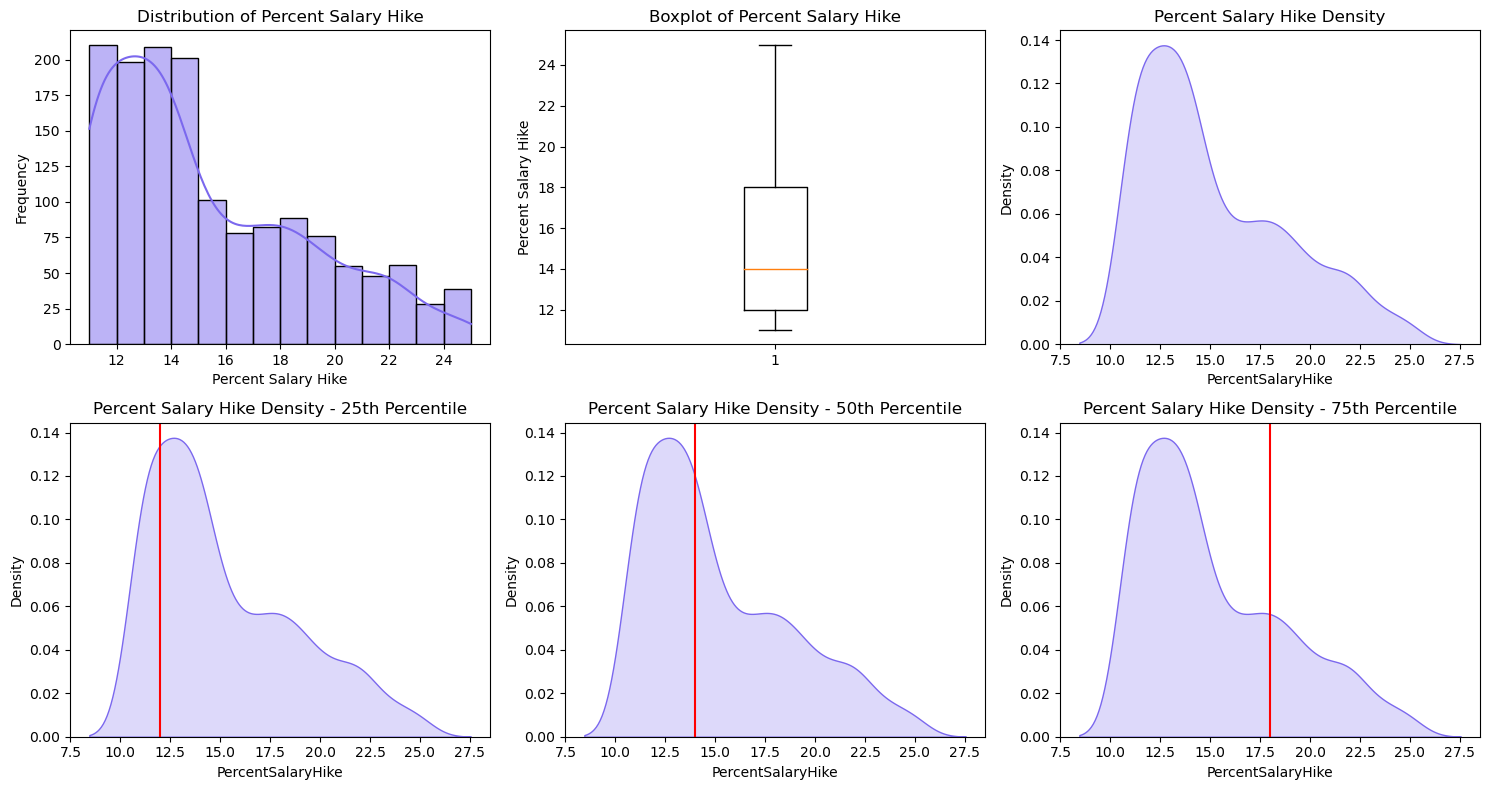

In [21]:
# Grafic Percent Salary Hike
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram
sns.histplot(data=df_integrated, x="PercentSalaryHike", kde=True, ax=axs.flat[0], color='mediumslateblue')
axs.flat[0].set_xlabel('Percent Salary Hike')
axs.flat[0].set_ylabel('Frequency')
axs.flat[0].set_title('Distribution of Percent Salary Hike')

# Boxplot
axs.flat[1].boxplot(df_integrated['PercentSalaryHike'])
axs.flat[1].set_title('Boxplot of Percent Salary Hike')
axs.flat[1].set_ylabel('Percent Salary Hike')

# Density chart
sns.kdeplot(df_integrated['PercentSalaryHike'], shade=True, color='mediumslateblue', ax=axs.flat[2])
axs.flat[2].set_title('Percent Salary Hike Density')

# Density charts with 25th, 50th and 75th percentiles
for i, percentile in enumerate([25, 50, 75]):
    sns.kdeplot(df_integrated['PercentSalaryHike'], shade=True, color='mediumslateblue', ax=axs.flat[i+3])
    axs.flat[i+3].axvline(x=np.percentile(df_integrated['PercentSalaryHike'], percentile), color='red')
    axs.flat[i+3].set_title(f'Percent Salary Hike Density - {percentile}th Percentile')

plt.tight_layout()
plt.show()

In [22]:
hourly_rate_stats = df_integrated['PercentSalaryHike'].describe()
print(hourly_rate_stats)

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


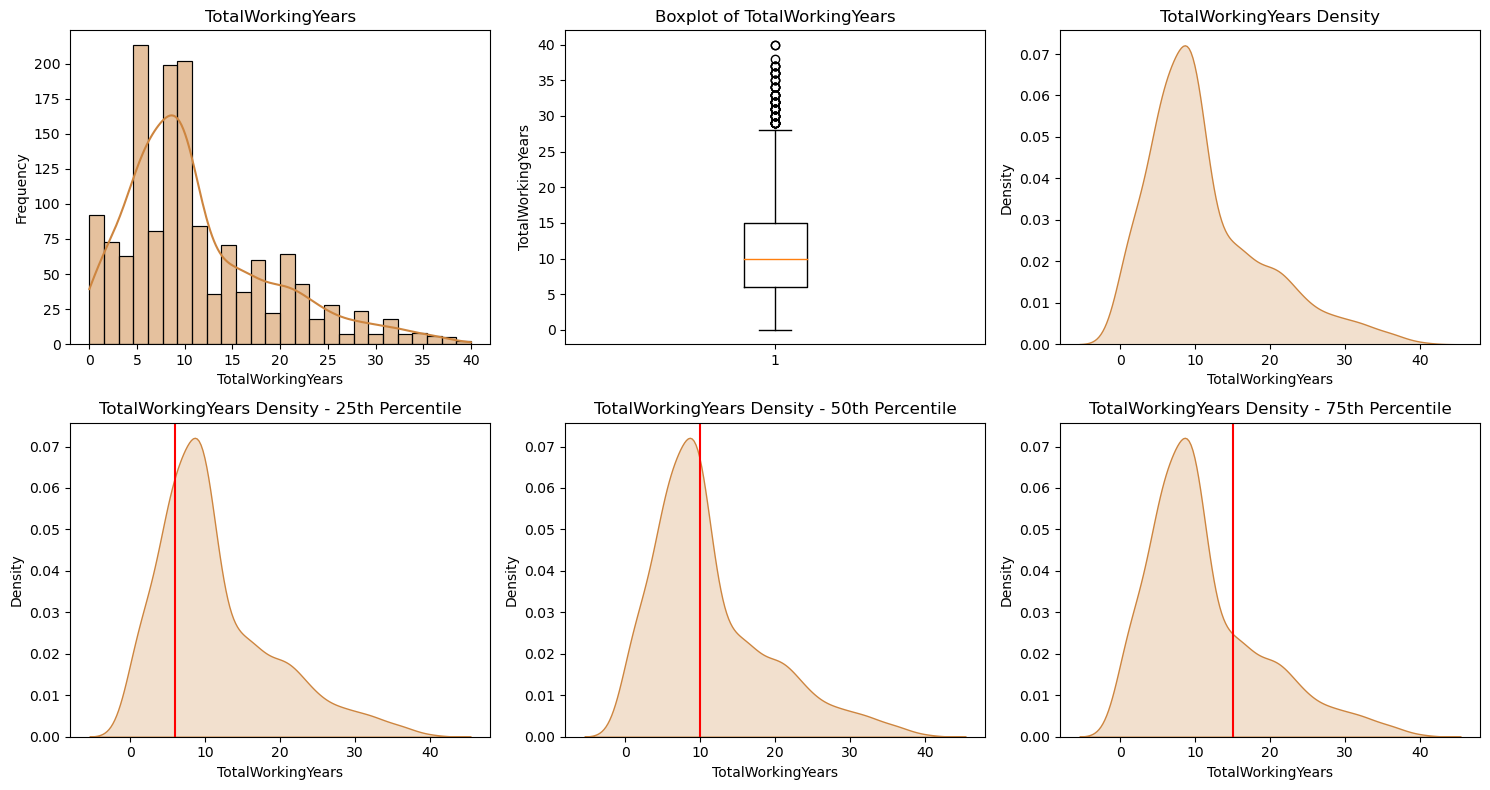

In [23]:
# Grafic Total Working Years
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram
sns.histplot(data=df_integrated, x="TotalWorkingYears", kde=True, ax=axs.flat[0], color='peru')
axs.flat[0].set_xlabel('TotalWorkingYears')
axs.flat[0].set_ylabel('Frequency')
axs.flat[0].set_title('TotalWorkingYears')

# Boxplot
axs.flat[1].boxplot(df_integrated['TotalWorkingYears'])
axs.flat[1].set_title('Boxplot of TotalWorkingYears')
axs.flat[1].set_ylabel('TotalWorkingYears')

# Density chart
sns.kdeplot(df_integrated['TotalWorkingYears'], shade=True, color='peru', ax=axs.flat[2])
axs.flat[2].set_title('TotalWorkingYears Density')

# Density charts with 25th, 50th and 75th percentiles
for i, percentile in enumerate([25, 50, 75]):
    sns.kdeplot(df_integrated['TotalWorkingYears'], shade=True, color='peru', ax=axs.flat[i+3])
    axs.flat[i+3].axvline(x=np.percentile(df_integrated['TotalWorkingYears'], percentile), color='red')
    axs.flat[i+3].set_title(f'TotalWorkingYears Density - {percentile}th Percentile')

plt.tight_layout()
plt.show()

In [24]:
hourly_rate_stats = df_integrated['TotalWorkingYears'].describe()
print(hourly_rate_stats)

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


 ## LDA (Linear Discriminant Analysis) Vs PCA (Principal Component Analysis)

LDA and PCA are two dimensionality reduction techniques widely used in the field of machine learning and statistics. Although they have certain similarities, they also present significant differences in terms of their approach and applications.

>The LDA is a supervised technique that seeks to find a linear combination of predictor variables that maximizes the separation between different classes or categories in the data. The main objective of the LDA is to find a feature subspace that is optimal for the classification of the data. LDA is commonly used as a feature extraction and classification technique in pattern recognition and machine learning problems.

>PCA, on the other hand, is an unsupervised technique whose main objective is to describe the variance structure of a data set. PCA seeks to find a new base of uncorrelated variables, called principal components, that explain as much of the total variance of the original data as possible. PCA is commonly used as a data visualization and dimensionality reduction technique, and can also help remove noise and redundancies in data sets.

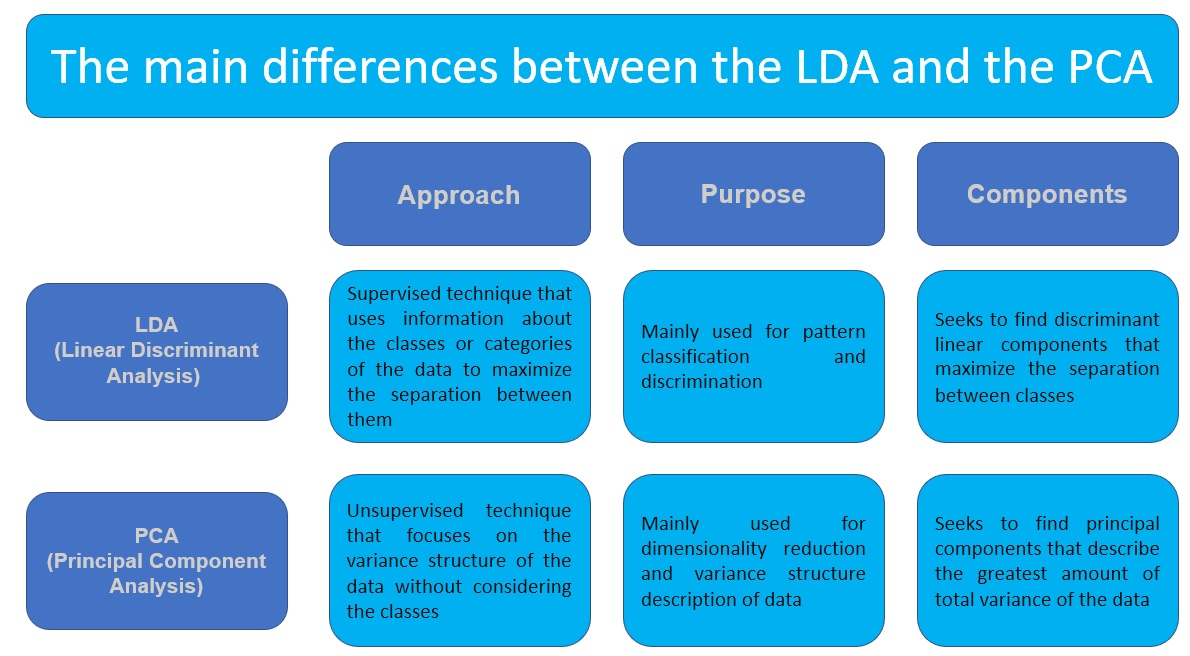

In [25]:
#Image
from IPython.display import Image
Image(filename =r'LDA_VS_PCA.jpg')

In summary, the LDA is used to find a linear combination of features that maximizes the separation between classes, while the PCA is used to find a new base of uncorrelated variables that describe the variance structure of the data. Both techniques are useful in different contexts and have wide applications in data processing and machine learning.

Reference: https://365datascience.com/tutorials/python-tutorials/lda-vs-pca/

### StandardScaler

StandardScaler is an important technique that is primarily performed as a preprocessing step before many machine learning models, to standardize the range of input dataset functionality.

When and how to use StandardScaler?

StandardScaler comes into play when the characteristics of the input data set differ a lot between their ranges, or simply when they are measured in different units of measurement, as in this case, since we have many category variables.

StandardScaler removes the mean and scales the data to the variance of unity. However, outliers have an influence when calculating the empirical mean and standard deviation, which narrows the range of characteristic values.

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to model fit and model learning function and could end up creating bias.

So, to deal with this potential problem, we need to standardize the (μ = 0, σ = 1) data that is typically used before integrating it into the machine learning model.

Reference: https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_integrated_without_JobSatisfaction = df_integrated.drop(["JobSatisfaction"], axis = 1)

df_integrated_without_JobSatisfaction_scaled = scaler.fit_transform(df_integrated_without_JobSatisfaction)

df_integrated_without_JobSatisfaction_scaled = pd.DataFrame(df_integrated_without_JobSatisfaction_scaled, 
                                                            columns=df_integrated_without_JobSatisfaction.columns)

In [27]:
df_integrated_without_JobSatisfaction_scaled.head(-5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.954395,-0.660531,1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.438422,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.954395,0.254625,-0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,-0.493817,-0.887515,-0.891688,2.191257,1.169781,-0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.438422,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.954395,1.169781,1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.438422,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.618431,-1.575686,-0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,-0.867672,-0.438422,0.590048,-0.829224,-0.493817,2.320735,1.061787,0.618431,1.169781,1.224745,...,-0.426230,-0.658973,-0.932014,-0.807339,0.155707,-2.493820,-0.327893,-0.063296,-0.679146,-0.034520
1461,1.431867,2.280906,0.590048,-0.973012,1.401512,2.320735,0.085049,-0.167982,1.169781,-0.816497,...,-0.426230,-0.658973,0.241988,1.121144,0.155707,0.338096,-0.654454,-0.615492,-0.058285,-1.155935
1462,0.227347,-0.438422,0.590048,-0.199532,1.401512,1.827158,-1.868426,-0.167982,-0.660531,1.224745,...,-0.426230,-1.584178,0.241988,1.249709,-0.620189,-1.077862,2.121310,1.317193,2.114728,0.526188
1463,-0.648668,-0.438422,-2.416437,-1.183736,-0.493817,-0.517332,0.085049,0.618431,-0.660531,-0.816497,...,-0.426230,-0.658973,-0.932014,-0.164511,-0.620189,0.338096,0.325228,-0.063296,-0.368715,0.806541


### PCA (Principal Component Analysis)

In [28]:
from sklearn.decomposition import PCA

pca = PCA(0.995).fit(df_integrated_without_JobSatisfaction_scaled)
num_components = pca.n_components_

print('Number of Components:', num_components)

Number of Components: 29


In [29]:
pca = PCA(29)

projected = pca.fit_transform(df_integrated_without_JobSatisfaction_scaled)

projected.shape

(1470, 29)

In [30]:
import pandas as pd

df_projected = pd.DataFrame(projected)

new_col_names = [f"A{i+1}" for i in range(29)]
df_projected.columns = new_col_names

In [31]:
df_projected.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29
0,-0.689086,0.483972,-2.442777,2.032590,-0.987553,2.631240,-1.449187,-0.899643,-1.879449,-1.153471,...,1.150686,-0.582052,-0.724443,0.451201,0.292379,-0.357696,-0.106801,-0.353427,-0.495936,-0.597945
1,0.612479,0.972013,2.989770,0.905562,-0.101574,-0.296597,1.078764,1.339955,2.032508,-1.039109,...,0.247515,-1.147454,0.463480,1.485861,-0.013523,0.688488,0.184093,-0.008184,-0.591862,-0.395624
2,-2.749951,-0.764057,-0.891643,1.495946,1.327747,1.132352,1.295154,-1.594467,-1.818189,2.688993,...,1.035092,-0.169364,0.165956,0.277786,0.363760,-0.316215,-0.075407,0.281418,0.046846,0.003372
3,-0.821407,0.466225,-1.065168,-0.592994,0.342036,0.147696,0.940451,-1.298920,0.650265,-1.754690,...,-0.715432,-0.186493,0.397992,-0.481425,-0.933063,0.298969,1.182380,-0.584292,0.470603,-0.095774
4,-1.791731,-1.341800,-0.545352,-0.513926,0.972032,-0.717769,0.441333,0.531525,0.442566,0.963679,...,1.925439,-0.762011,-0.751076,-1.095152,0.254472,-0.435999,-0.113699,-0.311721,0.133978,-0.002047


In [32]:
df_projected["JobSatisfaction"] = df_integrated['JobSatisfaction']

df_projected.head(-5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A21,A22,A23,A24,A25,A26,A27,A28,A29,JobSatisfaction
0,-0.689086,0.483972,-2.442777,2.032590,-0.987553,2.631240,-1.449187,-0.899643,-1.879449,-1.153471,...,-0.582052,-0.724443,0.451201,0.292379,-0.357696,-0.106801,-0.353427,-0.495936,-0.597945,4.0
1,0.612479,0.972013,2.989770,0.905562,-0.101574,-0.296597,1.078764,1.339955,2.032508,-1.039109,...,-1.147454,0.463480,1.485861,-0.013523,0.688488,0.184093,-0.008184,-0.591862,-0.395624,2.0
2,-2.749951,-0.764057,-0.891643,1.495946,1.327747,1.132352,1.295154,-1.594467,-1.818189,2.688993,...,-0.169364,0.165956,0.277786,0.363760,-0.316215,-0.075407,0.281418,0.046846,0.003372,3.0
3,-0.821407,0.466225,-1.065168,-0.592994,0.342036,0.147696,0.940451,-1.298920,0.650265,-1.754690,...,-0.186493,0.397992,-0.481425,-0.933063,0.298969,1.182380,-0.584292,0.470603,-0.095774,3.0
4,-1.791731,-1.341800,-0.545352,-0.513926,0.972032,-0.717769,0.441333,0.531525,0.442566,0.963679,...,-0.762011,-0.751076,-1.095152,0.254472,-0.435999,-0.113699,-0.311721,0.133978,-0.002047,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,-1.555528,1.136950,-0.548455,0.132498,0.921414,0.200642,-0.886166,-0.268496,-1.343907,-0.846655,...,-0.194116,-0.594862,-0.194763,-0.218916,0.686920,0.265610,0.034747,-0.107269,-0.016697,1.0
1461,0.465956,-0.762409,-1.612014,1.120685,-2.375265,2.876928,1.685881,0.925735,0.092453,0.477467,...,0.129995,0.833624,0.527309,-0.851333,-0.315836,0.218103,-0.144888,-0.027623,0.377951,1.0
1462,3.548506,2.158226,-0.816535,-1.034207,-0.957423,0.927054,-0.060067,1.113910,-1.665801,-0.427917,...,-0.053163,1.061789,-0.838643,-0.001473,0.012076,0.350888,-0.546457,0.507880,-0.346773,4.0
1463,0.109234,1.231872,0.551935,0.233602,1.395778,-0.841581,-1.026548,0.604533,1.355199,1.454034,...,0.047319,-0.541904,0.066184,0.228615,0.383510,-0.331964,1.037416,0.025952,0.013634,1.0


#### Machine Learning

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV

#### Applying the models with 10% test and 90% training

In [34]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('JobSatisfaction', axis=1)
y = df_projected['JobSatisfaction']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(1323, 29) (147, 29) (1323,) (147,)


In [35]:
y_train.value_counts()

3.0    406
4.0    403
2.0    260
1.0    254
Name: JobSatisfaction, dtype: int64

In [36]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [37]:
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'solver': ['liblinear', 'sag', 'saga'],
                      'multi_class': ['ovr', 'multinomial']}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 500],
                      'max_depth': [None, 5, 10]}
   
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_validation)

    accuracy = accuracy_score(y_validation, y_pred)
    results.append(accuracy)
    names.append(name)

    print('\nModel:', name)
    print('Best Parameters:', best_params)
    print('Accuracy:', accuracy)


Model: NB
Best Parameters: {}
Accuracy: 0.29931972789115646

Model: SVM
Best Parameters: {}
Accuracy: 0.29931972789115646

Model: KNN
Best Parameters: {}
Accuracy: 0.272108843537415

Model: RFC
Best Parameters: {}
Accuracy: 0.30612244897959184

Model: CART
Best Parameters: {}
Accuracy: 0.2653061224489796

Model: LR
Best Parameters: {}
Accuracy: 0.32653061224489793


Best Hyperparameters: {'multi_class': 'ovr', 'solver': 'sag'}
Accuracy Score:  0.32653061224489793

Classification Report:
               precision    recall  f1-score   support

         1.0       0.44      0.11      0.18        35
         2.0       0.00      0.00      0.00        20
         3.0       0.23      0.44      0.30        36
         4.0       0.42      0.50      0.46        56

    accuracy                           0.33       147
   macro avg       0.27      0.26      0.24       147
weighted avg       0.32      0.33      0.29       147


Confusion Matrix: 
 [[ 4  1 17 13]
 [ 2  0  9  9]
 [ 2  1 16 17]
 [ 1  0 27 28]]

Cross-Validation Scores: [0.34339623 0.26792453 0.26415094 0.3219697  0.28787879]
Average Cross-Validation Score: 0.2970640365923385


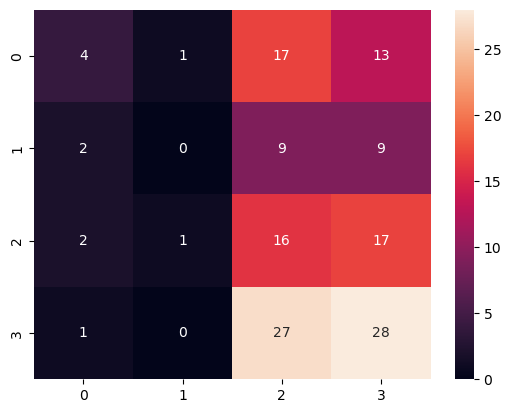

In [38]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'solver': ['liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial']}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

#### Applying the models with 20% test and 80% training

In [39]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('JobSatisfaction', axis=1)
y = df_projected['JobSatisfaction']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(1176, 29) (294, 29) (1176,) (294,)


In [40]:
y_train.value_counts()

4.0    361
3.0    353
2.0    237
1.0    225
Name: JobSatisfaction, dtype: int64

In [41]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [42]:
results = []
names = []
    # KFold
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'solver': ['liblinear', 'sag', 'saga'],
                      'multi_class': ['ovr', 'multinomial']}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 500],
                      'max_depth': [None, 5, 10]}
   
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_validation)

    accuracy = accuracy_score(y_validation, y_pred)
    results.append(accuracy)
    names.append(name)

    print('\nModel:', name)
    print('Best Parameters:', best_params)
    print('Accuracy:', accuracy)


Model: NB
Best Parameters: {}
Accuracy: 0.30952380952380953

Model: SVM
Best Parameters: {}
Accuracy: 0.2857142857142857

Model: KNN
Best Parameters: {}
Accuracy: 0.282312925170068

Model: RFC
Best Parameters: {}
Accuracy: 0.2857142857142857

Model: CART
Best Parameters: {}
Accuracy: 0.24149659863945577

Model: LR
Best Parameters: {}
Accuracy: 0.35034013605442177


Best Hyperparameters: {'multi_class': 'ovr', 'solver': 'liblinear'}
Accuracy Score:  0.35034013605442177

Classification Report:
               precision    recall  f1-score   support

         1.0       0.36      0.12      0.19        64
         2.0       0.20      0.05      0.08        43
         3.0       0.31      0.43      0.36        89
         4.0       0.40      0.56      0.47        98

    accuracy                           0.35       294
   macro avg       0.32      0.29      0.27       294
weighted avg       0.33      0.35      0.31       294


Confusion Matrix: 
 [[ 8  3 32 21]
 [ 4  2 17 20]
 [ 7  2 38 42]
 [ 3  3 37 55]]

Cross-Validation Scores: [0.25847458 0.30212766 0.24255319 0.29787234 0.30212766]
Average Cross-Validation Score: 0.2806310854670032


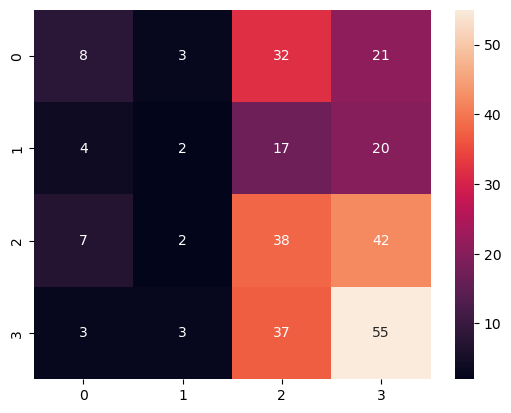

In [43]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'solver': ['liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial']}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

# Cross-Validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

### LDA (Linear Discriminant Analysis)

#### Machine Learning

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

y = df_integrated["JobSatisfaction"]
X = df_integrated.drop("JobSatisfaction", axis=1)

# LDA reduction
X_lda = lda.fit_transform(X, y)

num_components = X_lda.shape[1]
print('Number of Components:', num_components)
print('Explained variance ratio:', lda.explained_variance_ratio_)

Number of Components: 3
Explained variance ratio: [0.57310765 0.3162845  0.11060785]


#### Applying the models with 10% test and 90% training

In [45]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('JobSatisfaction', axis=1)
y = df_projected['JobSatisfaction']

X_train, X_validation, y_train, y_validation = train_test_split(X_lda, y, test_size=0.1, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(1323, 3) (147, 3) (1323,) (147,)


In [46]:
y_train.value_counts()

3.0    406
4.0    403
2.0    260
1.0    254
Name: JobSatisfaction, dtype: int64

In [47]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [48]:
results = []
names = []
    # KFold
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'solver': ['liblinear', 'sag', 'saga'],
                      'multi_class': ['ovr', 'multinomial']}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 500],
                      'max_depth': [None, 5, 10]}
   
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_validation)

    accuracy = accuracy_score(y_validation, y_pred)
    results.append(accuracy)
    names.append(name)

    print('\nModel:', name)
    print('Best Parameters:', best_params)
    print('Accuracy:', accuracy)


Model: NB
Best Parameters: {}
Accuracy: 0.36054421768707484

Model: SVM
Best Parameters: {}
Accuracy: 0.36054421768707484

Model: KNN
Best Parameters: {}
Accuracy: 0.24489795918367346

Model: RFC
Best Parameters: {}
Accuracy: 0.2925170068027211

Model: CART
Best Parameters: {}
Accuracy: 0.2585034013605442

Model: LR
Best Parameters: {}
Accuracy: 0.3673469387755102


Best Hyperparameters: {'multi_class': 'ovr', 'solver': 'liblinear'}
Accuracy Score:  0.3673469387755102

Classification Report:
               precision    recall  f1-score   support

         1.0       0.56      0.14      0.23        35
         2.0       0.00      0.00      0.00        20
         3.0       0.30      0.58      0.39        36
         4.0       0.43      0.50      0.46        56

    accuracy                           0.37       147
   macro avg       0.32      0.31      0.27       147
weighted avg       0.37      0.37      0.33       147


Confusion Matrix: 
 [[ 5  1 14 15]
 [ 1  0 10  9]
 [ 1  1 21 13]
 [ 2  0 26 28]]

Cross-Validation Scores: [0.38867925 0.32075472 0.31320755 0.36742424 0.38257576]
Average Cross-Validation Score: 0.35452830188679246


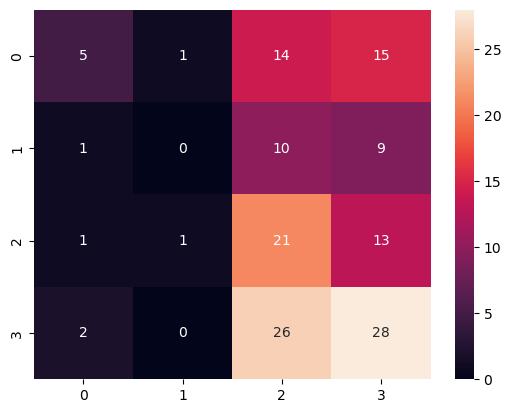

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'solver': ['liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial']}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

# Cross-Validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

#### Applying the models with 20% test and 80% training

In [50]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('JobSatisfaction', axis=1)
y = df_projected['JobSatisfaction']

X_train, X_validation, y_train, y_validation = train_test_split(X_lda, y, test_size=0.2, random_state=1)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(1176, 3) (294, 3) (1176,) (294,)


In [51]:
y_train.value_counts()

4.0    361
3.0    353
2.0    237
1.0    225
Name: JobSatisfaction, dtype: int64

In [52]:
models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

In [53]:
results = []
names = []
    # KFold
for name, model in models:
    kfold = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)

    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'solver': ['liblinear', 'sag', 'saga'],
                      'multi_class': ['ovr', 'multinomial']}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 500],
                      'max_depth': [None, 5, 10]}
   
    # GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='accuracy')

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_validation)

    accuracy = accuracy_score(y_validation, y_pred)
    results.append(accuracy)
    names.append(name)

    print('\nModel:', name)
    print('Best Parameters:', best_params)
    print('Accuracy:', accuracy)


Model: NB
Best Parameters: {}
Accuracy: 0.38095238095238093

Model: SVM
Best Parameters: {}
Accuracy: 0.3741496598639456

Model: KNN
Best Parameters: {}
Accuracy: 0.282312925170068

Model: RFC
Best Parameters: {}
Accuracy: 0.29931972789115646

Model: CART
Best Parameters: {}
Accuracy: 0.29591836734693877

Model: LR
Best Parameters: {}
Accuracy: 0.3877551020408163


Best Hyperparameters: {'multi_class': 'multinomial', 'solver': 'sag'}
Accuracy Score:  0.3843537414965986

Classification Report:
               precision    recall  f1-score   support

         1.0       0.50      0.17      0.26        64
         2.0       0.00      0.00      0.00        43
         3.0       0.35      0.47      0.40        89
         4.0       0.41      0.61      0.49        98

    accuracy                           0.38       294
   macro avg       0.31      0.31      0.29       294
weighted avg       0.35      0.38      0.34       294


Confusion Matrix: 
 [[11  1 23 29]
 [ 2  0 21 20]
 [ 6  2 42 39]
 [ 3  0 35 60]]

Cross-Validation Scores: [0.35169492 0.3106383  0.31489362 0.36170213 0.3787234 ]
Average Cross-Validation Score: 0.3435304724125496


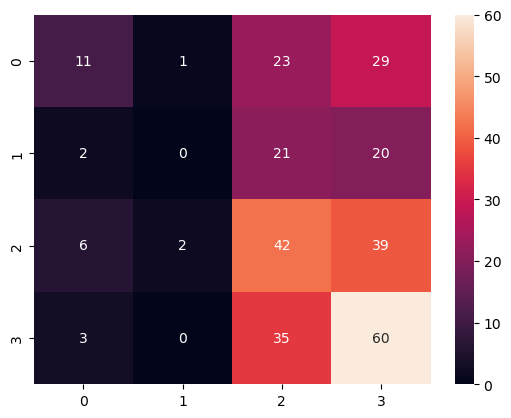

In [54]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'solver': ['liblinear', 'sag', 'saga'],
              'multi_class': ['ovr', 'multinomial']}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot=True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

# Cross-Validation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("\nCross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

# Evaluation (Model Comparison)

Model 1 - Logistic Regression with PCA 20% test -  80% training:

- Best Hyperparameters: {'multi_class': 'ovr', 'solver': 'liblinear'}
- Accuracy: 0.35
- Precision: The highest precision is found in category 4 (Very Satisfied) with a value of 0.40, followed by category 3 (Satisfied) with 0.31. Categories 1 (Unsatisfied) and 2 (Neutral) have a low precision of 0.36 and 0.20 respectively.
- Recall: The highest recall is found in category 4 (Very Satisfied) with a value of 0.56, followed by category 3 (Satisfied) with 0.43. Categories 1 (Unsatisfied) and 2 (Neutral) have a low recall of 0.12 and 0.05 respectively.
- F1-score: The highest F1-score is found in category 4 (Very Satisfied) with a value of 0.47, followed by category 3 (Satisfied) with 0.36. Categories 1 (Unsatisfied) and 2 (Neutral) have a low F1-score of 0.19 and 0.08 respectively.
- Cross-Validation Score: The average of the cross-validation scores is 0.28, which indicates an average performance of the model in different data sets.


Model 2 - Logistic Regression with LDA 20% test -  80% training:

- Best Hyperparameters: {'multi_class': 'multinomial', 'solver': 'sag'}
- Accuracy: 0.38
- Precision: The highest precision is found in category 4 (Very Satisfied) with a value of 0.41, followed by category 3 (Satisfied) with 0.35. Category 1 (Unsatisfied) has a moderate precision of 0.50, while category 2 (Neutral) has a low precision of 0.00.
- Recall: The highest recall is found in category 4 (Very Satisfied) with a value of 0.61, followed by category 3 (Satisfied) with 0.47. Category 1 (Unsatisfied) has a moderate recall of 0.17, while Category 2 (Neutral) has no recall because it was not predicted in the test set.
- F1-score: The highest F1-score is in category 4 (Very Satisfied) with a value of 0.49, followed by category 3 (Satisfied) with 0.40. Category 1 (Unsatisfied) has a moderate F1-score of 0.26, while Category 2 (Neutral) has no F1-score because it was not predicted in the test set.
- Cross-Validation Score: The average of the cross-validation scores is 0.34, which indicates an average performance of the model in different data sets.


In general terms, both models perform similarly, but Model 2 with LDA shows an improvement in accuracy, recall and F1-score for category 1 (Unsatisfied) compared to Model 1 with PCA. However, Model 2 has difficulties in predicting category 2 (Neutral), which is reflected in precision, recall and F1-score of 0 for that category.

It is important to note that the cross-validation scores on both models are low, suggesting that the models may not generalize well to new data sets.

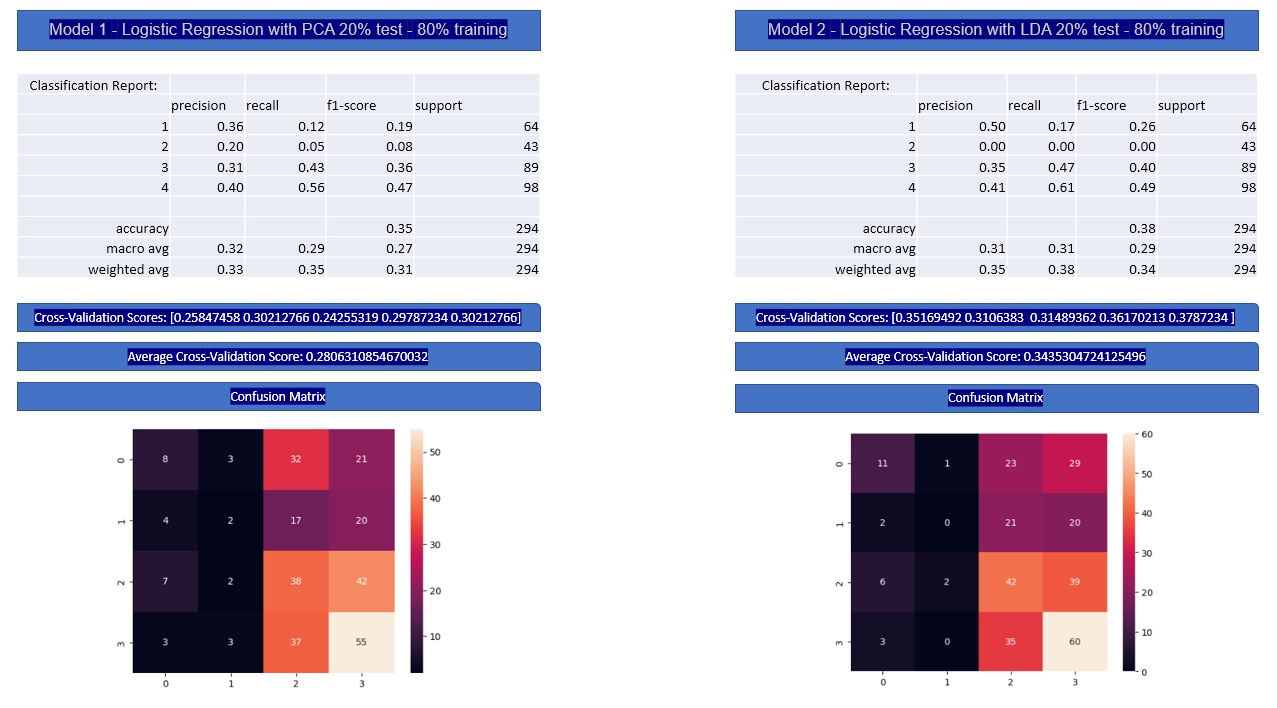

In [55]:
#Image
from IPython.display import Image
Image(filename =r'Model_Comparison.jpg')

# Bibliography

Reference : 

- Stack Overflow [online] (May 10, 2021) Available at: https://stackoverflow.com/questions/67474348/how-do-i-create-a-bar-chart-with-percentage-values-in-python-plotly-express

- GeeksforGeeks [online] (16 Jul, 2020) Available at: https://www.geeksforgeeks.org/python-binomial-distribution/?ref=gcse

- Scribbr [online] Published on November 5, 2020 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/standard-normal-distribution/

- nbconvert documentation, Jupyter Development Team [online] Available at: https://nbconvert.readthedocs.io/en/latest/install.html

- Scribbr, Published on January 28, 2020 by Rebecca Bevans. Available at: https://www.scribbr.com/statistics/statistical-tests/

- Scribbr, Published on December 8, 2021 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/missing-data/

- W3schools, Pandas DataFrame astype() Method. Available at: https://www.w3schools.com/python/pandas/ref_df_astype.asp

- Microsoft, Normalize Data component. Article 11/04/2021. Available at: https://learn.microsoft.com/en-us/azure/machine-learning/component-reference/normalize-data?view=azureml-api-2

- Scikit-Learn, sklearn.preprocessing.StandardScaler, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Analytics Vidhya by Aniruddha Bhandari — Published On April 3, 2020. Available at: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

- GeeksforGeeks. ML | Principal Component Analysis(PCA), by aishwarya.27. Available at: https://www.geeksforgeeks.org/ml-principal-component-analysispca/

- Scikit-Learn, sklearn.decomposition.PCA. Available at:https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- W3Schools, Copyright 1999-2023 by Refsnes Data [online] Available at: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php

- Copyright © the Python Graph Gallery 2018 [online] Available at: https://www.python-graph-gallery.com/barplot/

- By Abhishek Wasnik / October 26, 2020. Available at: https://www.askpython.com/python/normal-distribution

- By GreekDataGuy / Jan 2, 2020. Available at: https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

- GeeksforGeeks., 2021. Exploratory Data Analysis by KattamuriMeghna. Available at: https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

- Scikit-Learn, sklearn.preprocessing.StandardScaler, Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Scikit-Learn, sklearn.decomposition.PCA. Available at:https://scikitlearn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Medium Dec 25, 2019, by Aayush Bajaj. Available at: https://towardsdatascience.com/what-does-your-classification-metric-tell-about-your-data-4a8f35408a8b#:~:text=A%20low%20recall%20score%20